In [3]:
%%capture

!pip install understat
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

import asyncio
import json
import aiohttp
from understat import Understat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
async def get_table(team):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        results = await understat.get_team_results(
            team,
            2020,
            isResult = True
        )
        return results

loop = asyncio.get_event_loop()

In [5]:
teams = ['Manchester City','Liverpool','Arsenal']
df = pd.DataFrame(columns = teams)
points = {'l':0,'w':3,'d':1}
total_matches = 28
for team in teams:
  print(team)
  points_by_game = []
  results = loop.run_until_complete(get_table(team))
  for match in results[:total_matches]:
    points_by_game.append(points[match['result']])
  l = len(points_by_game)
  df[team] = np.cumsum(points_by_game)

df.index+=1

Manchester City
Liverpool
Arsenal


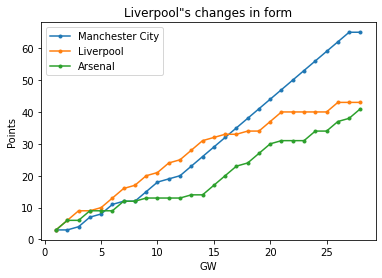

In [6]:
ax = df.plot(marker='o',markersize = 3)
ax.set_xlabel('GW')
ax.set_ylabel('Points')
ax.set_title('Liverpool"s changes in form')
plt.show()
